# Things to investigate #

link to dataset: https://www.kaggle.com/datasets/imuhammad/course-reviews-on-coursera?resource=download

* Missing values
* no. of entries for each institution. Does it make sense to include reviews on modules from diff institutions? How representative is it likely to be
* no. of different modules
* How many entries altogether
* A list of the different modules
* deciding which modules to include and not include
* How many entries would I require to train the model - over 1 million available, I feel that 5 - 10K is okay to get decent metrics but will have to experiment
* Need to find out how many entries there are for each (academic) year
* maybe categorise each module by a department, e.g., CS, Engineering, Biological Sciences analogous to Warwick to make the app as complete as possible
* for MVP, analysis for CS department modules output
* Need to manually label the data using (pre-trainedBERT, other sentiment analysis, lexicon creation)
* label data using pre-trained models or traditional ML methods(Random Forest, SVM) for sentiment and emotion classification (custom emotion label will require finetuning) -> infeasible to label manually - too many data points
* check results without finetuning, if not good enough, finetune for student data (but probably not necessary) --> combine with lexicon creation
* most of the work is required in the opinion mining/topic modelling and the integration of lexicon creation
* Also integration of rating with sentiment
* Topic Modelling
* time series analysis of classification, topics

# Plan: T1 W2-W4/W5 (10/10/2024 - 24/10/2024) #
*gantt chart has been updated 

* According to timetable, have until next week to find suitable dataset, but already found, so now change to analyse, clean and preprocess dataset during this time period.
* General Preprocessing
* (Preprocessing for the different experiments will be done during each experiment)
* Since the goal is to produce an MVP by the time of the progress report, it is not necessary to use all the data points for classification. 1k - 3k data points will suffice for modules in the 'Computer Science' department. Is this sufficient as an MVP?
* initial model is proof that it works, final model will have to be adjusted. Is this fair for initial, that is the subset I want to use
* initial model for MVP to be based on entries for academoc department 'Computer Science' only
* For the prototype, will categorise as many academic departments as appropriate (may not be necessary to include all but could be useful for completeness)

In [2]:
import pandas as pd

# Adjust the file path to the CSV file
df_reviews = pd.read_csv('~/cs310/datasets/Coursera_reviews.csv')

# Display the first few rows of the dataframe
# print(df.iloc[100:200])

# detail the flowchart
# initial data analysis

In [3]:
# probably not going to need this dataset
import pandas as pd

# Adjust the file path to the CSV file
df_courses = pd.read_csv('~/cs310/datasets/Coursera_courses.csv')

# Display the first few rows of the dataframe
# print(df.head())

In [4]:
df_courses

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution


In [5]:
df_reviews

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454558 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [7]:
# the number of empty reviews
df_reviews.isnull().sum()

reviews         153
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

In [8]:
df_reviews['course_id'].unique() # the unique courses

array(['google-cbrs-cpi-training', 'financial-markets-global',
       'introduction-psychology', 'python', 'computer-networking',
       'ai-for-everyone', 'python-crash-course',
       'psychological-first-aid', 'neural-networks-deep-learning',
       'what-is-datascience', 'negotiation-skills',
       'uva-darden-project-management', 'project-management', 'brand',
       'sciwrite', 'food-and-health',
       'html-css-javascript-for-web-developers', 'excel-essentials',
       'negotiation', 'everyday-excel-part-1', 'learning-how-to-learn',
       'gcp-fundamentals', 'wharton-contagious-viral-marketing',
       'python-data', 'private-equity', 'learn-korean',
       'introduction-tensorflow', 'os-power-user',
       'open-source-tools-for-data-science', 'deep-neural-network',
       'diversity-inclusion-workplace', 'clinical-trials',
       'visual-elements-user-interface-design', 'mafash', 'pap',
       'social-psychology', 'project-planning',
       'computational-thinking-problem-s

In [9]:
len(df_reviews['course_id'].unique()) # the unique courses

604

In [10]:
# Filter rows where 'course_id' equals 'python' and get unique values
# based on this, more than enough data to focus solely on CS department initially

unique_count = df_reviews[df_reviews['course_id'] == 'python-data-analysis']['reviews'].nunique() # the number of reviews for the 'python-data-analysis' course

print(unique_count)


4700


# based on previous want to

* remove entries w empty reviews
* make a copy of both datasets and:
    * drop the reviewer column
    * drop modules unrelated to CS
* look at which institutions the module is from
* reviews by date - get date range to plot

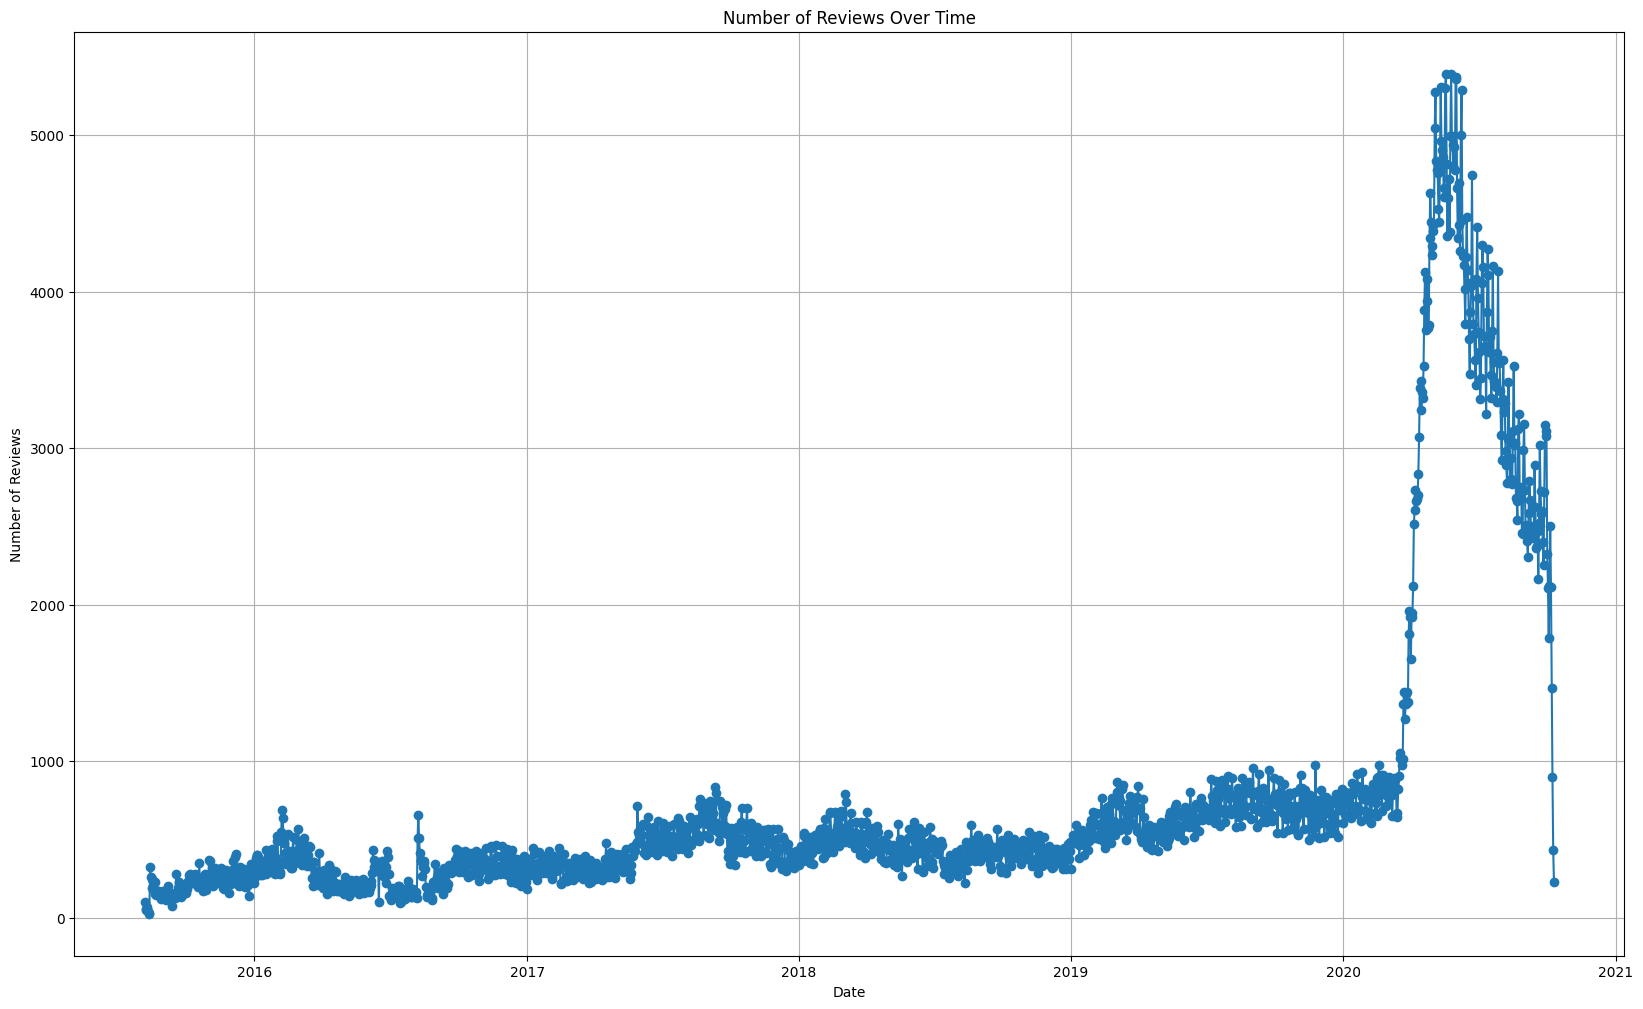

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate by date to get the count of reviews per date
df_aggregated = df_reviews.groupby('date_reviews').size().reset_index(name='review_count')

# Plot the aggregated data
plt.figure(figsize=(20, 12))
plt.plot(df_aggregated['date_reviews'], df_aggregated['review_count'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time')
plt.grid(True)
plt.show()



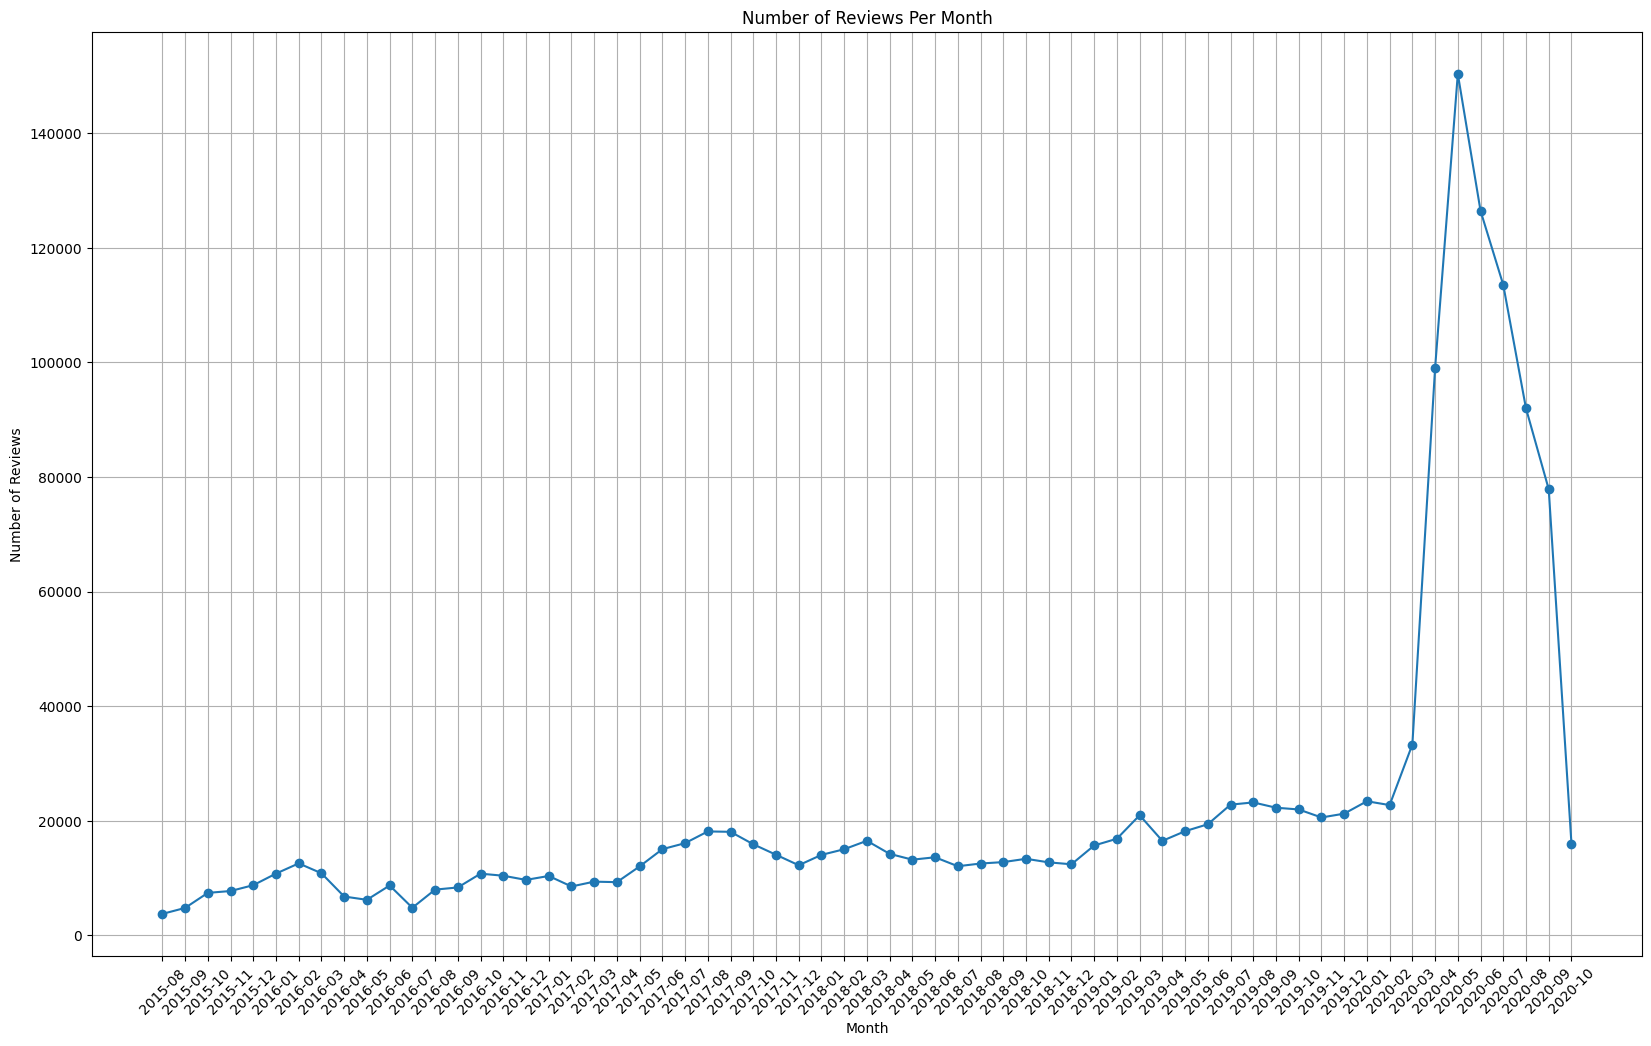

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_reviews is your DataFrame and 'date_reviews' is the date column
# Convert 'date_reviews' to datetime format
df_reviews['date_reviews'] = pd.to_datetime(df_reviews['date_reviews'], format='%b %d, %Y')

# Group by month and count the reviews per month
df_reviews['month'] = df_reviews['date_reviews'].dt.to_period('M')
df_aggregated = df_reviews.groupby('month').size().reset_index(name='review_count')

# Plot the aggregated data
plt.figure(figsize=(20, 12))
plt.plot(df_aggregated['month'].astype(str), df_aggregated['review_count'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


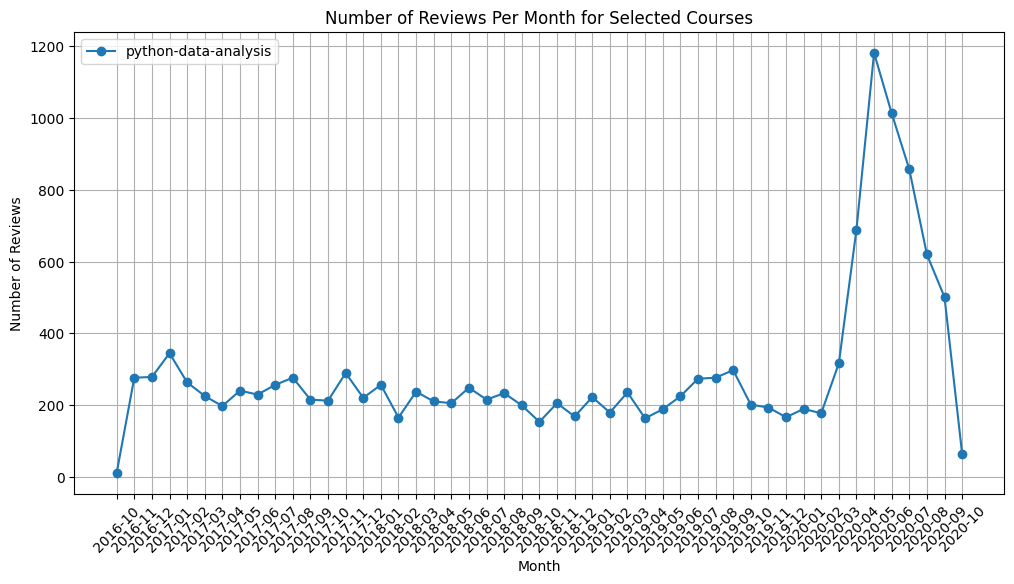

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation (assuming you have df_reviews)
# df_reviews = pd.DataFrame({'date_reviews': ['Feb 12, 2020', 'Feb 15, 2020', 'Mar 01, 2020', ...],
#                            'course_id': ['python-data-analysis', 'python', 'python-data-analysis', ...]})

# Convert 'date_reviews' to datetime format
df_reviews['date_reviews'] = pd.to_datetime(df_reviews['date_reviews'], format='%b %d, %Y')

# Filter for specific course IDs
filtered_df = df_reviews[df_reviews['course_id'].isin(['python-data-analysis'])] # add more module names as required

# Extract month from the date using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'month'] = filtered_df['date_reviews'].dt.to_period('M')

# Group by month and course_id, counting the reviews
df_aggregated = (filtered_df
                 .groupby(['month', 'course_id'])
                 .size()
                 .reset_index(name='review_count'))

# Plotting
plt.figure(figsize=(12, 6))

# Create a line plot for each course_id
for course_id in df_aggregated['course_id'].unique():
    plt.plot(df_aggregated[df_aggregated['course_id'] == course_id]['month'].astype(str), 
             df_aggregated[df_aggregated['course_id'] == course_id]['review_count'], 
             marker='o', 
             linestyle='-', 
             label=course_id)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Per Month for Selected Courses')
plt.xticks(rotation=45)
plt.legend()  # Show legend for course IDs
plt.grid(True)

# Show the plot
plt.show()


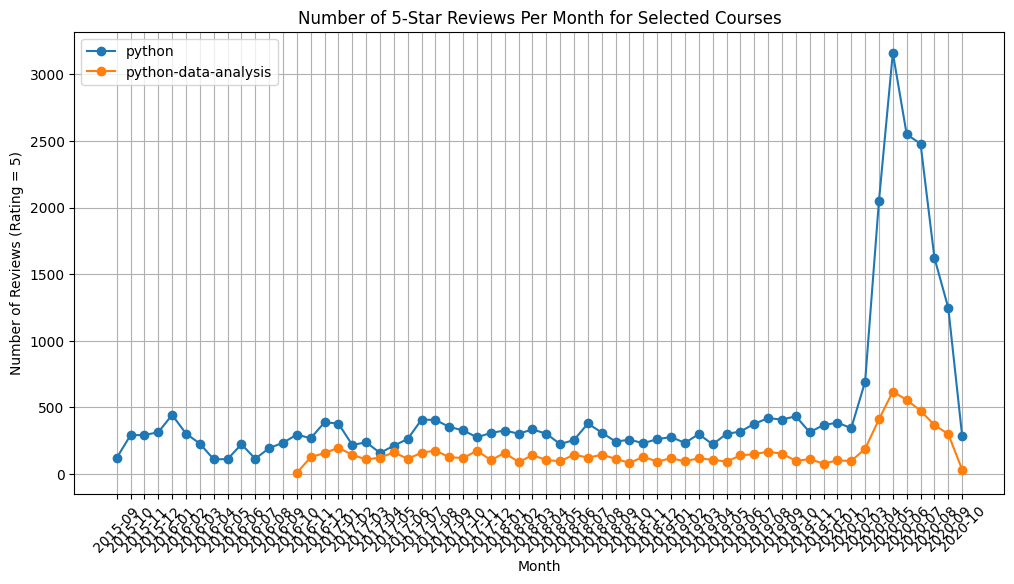

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation (assuming you have df_reviews)
# df_reviews = pd.DataFrame({
#     'date_reviews': ['Feb 12, 2020', 'Feb 15, 2020', 'Mar 01, 2020', ...],
#     'course_id': ['python-data-analysis', 'python', 'python-data-analysis', ...],
#     'rating': [5, 4, 5, ...]
# })

# Convert 'date_reviews' to datetime format
df_reviews['date_reviews'] = pd.to_datetime(df_reviews['date_reviews'], format='%b %d, %Y')

# Filter for specific course IDs and a rating of 5
filtered_df = df_reviews[
    (df_reviews['course_id'].isin(['python-data-analysis', 'python'])) & 
    (df_reviews['rating'] == 5)
]

# Extract month from the date using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'month'] = filtered_df['date_reviews'].dt.to_period('M')

# Group by month and course_id, counting the reviews
df_aggregated = (filtered_df
                 .groupby(['month', 'course_id'])
                 .size()
                 .reset_index(name='review_count'))

# Plotting
plt.figure(figsize=(12, 6))

# Create a line plot for each course_id
for course_id in df_aggregated['course_id'].unique():
    plt.plot(df_aggregated[df_aggregated['course_id'] == course_id]['month'].astype(str), 
             df_aggregated[df_aggregated['course_id'] == course_id]['review_count'], 
             marker='o', 
             linestyle='-', 
             label=course_id)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Reviews (Rating = 5)')
plt.title('Number of 5-Star Reviews Per Month for Selected Courses')
plt.xticks(rotation=45)
plt.legend()  # Show legend for course IDs
plt.grid(True)

# Show the plot
plt.show()


In [19]:
# Assuming your DataFrame is named `df_reviews` and has a column `course_id`

# List of course IDs related to Computer Science
cs_courses = [
    'python-data-analysis', 'python', 'computer-networking', 'python-crash-course',
    'neural-networks-deep-learning', 'what-is-datascience',
    'introduction-tensorflow', 'open-source-tools-for-data-science',
    'deep-neural-network', 'sql-for-data-science', 'system-administration-it-infrastructure-services',
    'introduction-cybersecurity-cyber-attacks', 'data-scientists-tools',
    'convolutional-neural-networks-tensorflow', 'python-network-data',
    'machine-learning-projects', 'convolutional-neural-networks',
    'python-basics', 'it-security', 'cs-fundamentals-1',
    'gcp-big-data-ml-fundamentals', 'sql-data-science', 
    'natural-language-processing-tensorflow', 'python-operating-system',
    'programming-fundamentals', 'python-statistics-financial-analysis',
    'machine-learning', 'python-databases', 'ai-for-everyone',
    'data-analysis-with-python', 'machine-learning-with-python',
    'python-programming-introduction', 'uol-machine-learning-for-all',
    'python-data-visualization', 'introduction-to-cloud',
    'cloud-infrastructure-design-process', 'aws-fundamentals-going-cloud-native',
    'tensorflow-sequences-time-series-and-prediction',
    'computational-thinking-problem-solving', 'introduction-to-computer-programming',
    'python-functions-files-dictionaries', 'programming-languages',
    'data-analytics-for-lean-six-sigma', 'big-data-introduction',
    'python-for-applied-data-science-ai', 'big-data-essentials',
    'python-plotting', 'version-control-with-git',
    'data-visualization-tableau', 'ai-for-medical-diagnosis',
    'python-for-data-visualization', 'python-machine-learning',
    'google-cloud-product-fundamentals', 'building-modern-python-applications-on-aws',
    'data-lakes-data-warehouses-gcp', 'introduction-to-ai',
    'algorithmic-toolbox', 'gcp-infrastructure-foundation', 
    'aws-machine-learning', 'machine-learning-business-professionals',
    'object-oriented-design', 'neuroeconomics', 'cloud-azure-intro',
    'data-science-methodology', 'gcp-infrastructure-core-services', 
    'data-management', 'quantum-computing-algorithms',
    'digital-business-models', 'cybersecurity-compliance-framework-system-administration',
    'python-osnovy-programmirovaniya', 'applied-data-science-capstone',
    'computer-science', 'information-security-data'
]

# Assign 'Computer Science' to courses in the list
df_reviews['departments'] = df_reviews['course_id'].apply(lambda x: 'Computer Science' if x in cs_courses else None)
df_reviews


,reviews,reviewers,date_reviews,rating,course_id,month,departments
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,2020-02,None
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,2020-09,None
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,2020-04,None
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training,2020-02,None
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training,2020-06,None
...,...,...,...,...,...,...,...
1454706,g,By Brijesh K,2020-08-25,5,computer-networking,2020-08,Computer Science
1454707,.,By Vasavi V M,2020-07-02,5,computer-networking,2020-07,Computer Science
1454708,.,By Drishti D,2020-06-20,5,computer-networking,2020-06,Computer Science
1454709,.,By FAUSTINE F K,2020-06-07,5,computer-networking,2020-06,Computer Science


In [20]:
unique_count = df_reviews[df_reviews['departments'] == 'Computer Science']['reviews'].nunique() # the number of reviews for the 'python-data-analysis' course

print(unique_count)

134786


In [21]:
df_cs_reviews = df_reviews[df_reviews['departments'] == 'Computer Science']['reviews']

In [23]:
df_reviews_copy = df_reviews.copy()
df_reviews_copy

,reviews,reviewers,date_reviews,rating,course_id,month,departments
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,2020-02,None
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,2020-09,None
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,2020-04,None
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training,2020-02,None
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training,2020-06,None
...,...,...,...,...,...,...,...
1454706,g,By Brijesh K,2020-08-25,5,computer-networking,2020-08,Computer Science
1454707,.,By Vasavi V M,2020-07-02,5,computer-networking,2020-07,Computer Science
1454708,.,By Drishti D,2020-06-20,5,computer-networking,2020-06,Computer Science
1454709,.,By FAUSTINE F K,2020-06-07,5,computer-networking,2020-06,Computer Science


In [29]:
df_cs_reviews_only = df_reviews_copy[df_reviews_copy['departments'] == 'Computer Science']
df_cs_reviews_only

,reviews,reviewers,date_reviews,rating,course_id,month,departments
15727,I did not find this course helpful. The assign...,By Eric V H,2017-10-05,1,python,2017-10,Computer Science
15728,I got a 95% and maybe I learned something but ...,By Connor B,2017-08-06,1,python,2017-08,Computer Science
15729,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,2019-03-28,1,python,2019-03,Computer Science
15730,We tried to use this class to teach a brown ba...,By Steve M,2015-10-20,1,python,2015-10,Computer Science
15731,"To be honest, I thought the course stumbled an...",By Terence P,2016-05-11,1,python,2016-05,Computer Science
...,...,...,...,...,...,...,...
1454706,g,By Brijesh K,2020-08-25,5,computer-networking,2020-08,Computer Science
1454707,.,By Vasavi V M,2020-07-02,5,computer-networking,2020-07,Computer Science
1454708,.,By Drishti D,2020-06-20,5,computer-networking,2020-06,Computer Science
1454709,.,By FAUSTINE F K,2020-06-07,5,computer-networking,2020-06,Computer Science


In [30]:
# checking for duplicates
df_cs_reviews_only.drop_duplicates(keep='first')# Drop all occurrences of duplicates
df_cs_reviews_only


,reviews,reviewers,date_reviews,rating,course_id,month,departments
15727,I did not find this course helpful. The assign...,By Eric V H,2017-10-05,1,python,2017-10,Computer Science
15728,I got a 95% and maybe I learned something but ...,By Connor B,2017-08-06,1,python,2017-08,Computer Science
15729,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,2019-03-28,1,python,2019-03,Computer Science
15730,We tried to use this class to teach a brown ba...,By Steve M,2015-10-20,1,python,2015-10,Computer Science
15731,"To be honest, I thought the course stumbled an...",By Terence P,2016-05-11,1,python,2016-05,Computer Science
...,...,...,...,...,...,...,...
1454706,g,By Brijesh K,2020-08-25,5,computer-networking,2020-08,Computer Science
1454707,.,By Vasavi V M,2020-07-02,5,computer-networking,2020-07,Computer Science
1454708,.,By Drishti D,2020-06-20,5,computer-networking,2020-06,Computer Science
1454709,.,By FAUSTINE F K,2020-06-07,5,computer-networking,2020-06,Computer Science


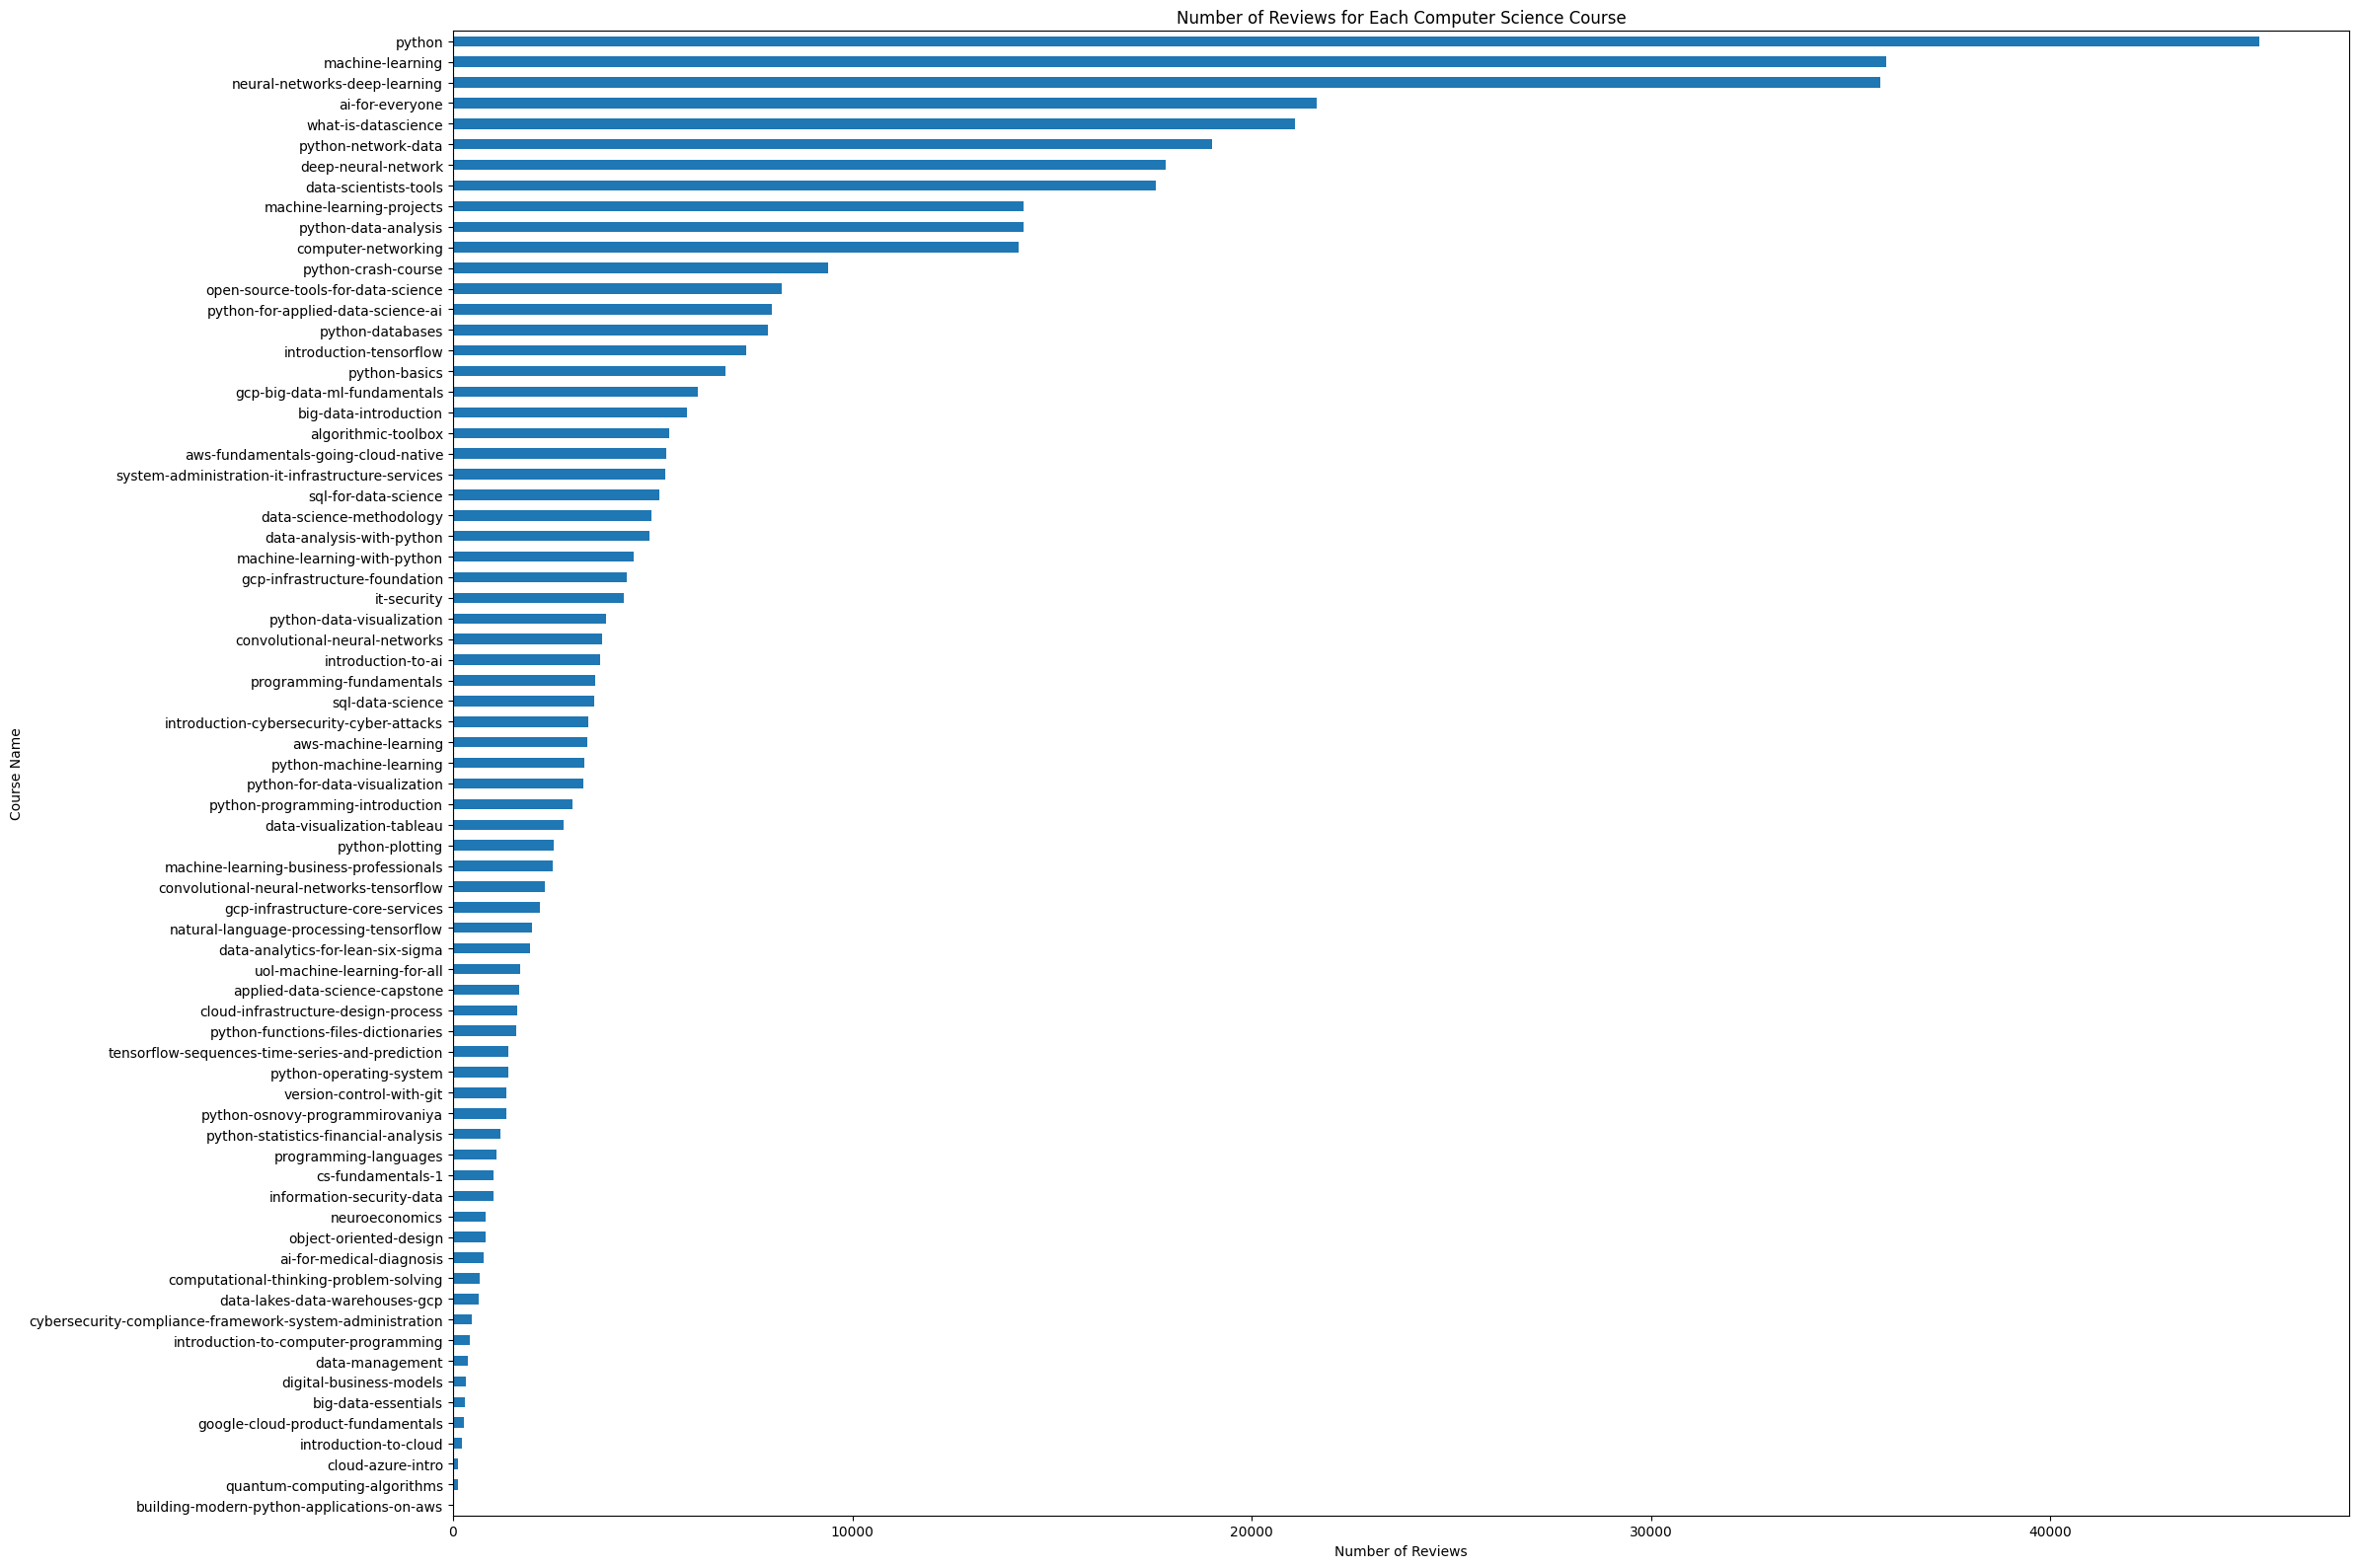

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# List of computer science courses to filter
cs_courses = [
    'python-data-analysis', 'python', 'computer-networking', 'python-crash-course',
    'neural-networks-deep-learning', 'what-is-datascience',
    'introduction-tensorflow', 'open-source-tools-for-data-science',
    'deep-neural-network', 'sql-for-data-science', 'system-administration-it-infrastructure-services',
    'introduction-cybersecurity-cyber-attacks', 'data-scientists-tools',
    'convolutional-neural-networks-tensorflow', 'python-network-data',
    'machine-learning-projects', 'convolutional-neural-networks',
    'python-basics', 'it-security', 'cs-fundamentals-1',
    'gcp-big-data-ml-fundamentals', 'sql-data-science', 
    'natural-language-processing-tensorflow', 'python-operating-system',
    'programming-fundamentals', 'python-statistics-financial-analysis',
    'machine-learning', 'python-databases', 'ai-for-everyone',
    'data-analysis-with-python', 'machine-learning-with-python',
    'python-programming-introduction', 'uol-machine-learning-for-all',
    'python-data-visualization', 'introduction-to-cloud',
    'cloud-infrastructure-design-process', 'aws-fundamentals-going-cloud-native',
    'tensorflow-sequences-time-series-and-prediction',
    'computational-thinking-problem-solving', 'introduction-to-computer-programming',
    'python-functions-files-dictionaries', 'programming-languages',
    'data-analytics-for-lean-six-sigma', 'big-data-introduction',
    'python-for-applied-data-science-ai', 'big-data-essentials',
    'python-plotting', 'version-control-with-git',
    'data-visualization-tableau', 'ai-for-medical-diagnosis',
    'python-for-data-visualization', 'python-machine-learning',
    'google-cloud-product-fundamentals', 'building-modern-python-applications-on-aws',
    'data-lakes-data-warehouses-gcp', 'introduction-to-ai',
    'algorithmic-toolbox', 'gcp-infrastructure-foundation', 
    'aws-machine-learning', 'machine-learning-business-professionals',
    'object-oriented-design', 'neuroeconomics', 'cloud-azure-intro',
    'data-science-methodology', 'gcp-infrastructure-core-services', 
    'data-management', 'quantum-computing-algorithms',
    'digital-business-models', 'cybersecurity-compliance-framework-system-administration',
    'python-osnovy-programmirovaniya', 'applied-data-science-capstone',
    'computer-science', 'information-security-data'
]

# Filter the DataFrame for these courses
filtered_df = df_cs_reviews_only[df_cs_reviews_only['course_id'].isin(cs_courses)]

# Count the number of occurrences of reviews for each course
review_counts = filtered_df['course_id'].value_counts()

# Plot the results
plt.figure(figsize=(24, 16))
review_counts.plot(kind='barh')
plt.xlabel('Number of Reviews')
plt.ylabel('Course Name')
plt.title('Number of Reviews for Each Computer Science Course')
plt.gca().invert_yaxis()  # To have the highest count at the top
plt.tight_layout()
plt.show()


In [41]:
df_cs_reviews_only = df_cs_reviews_only.dropna(subset=['reviews']) # remove empty reviews
df_cs_reviews_only

,reviews,reviewers,date_reviews,rating,course_id,month,departments
15727,I did not find this course helpful. The assign...,By Eric V H,2017-10-05,1,python,2017-10,Computer Science
15728,I got a 95% and maybe I learned something but ...,By Connor B,2017-08-06,1,python,2017-08,Computer Science
15729,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,2019-03-28,1,python,2019-03,Computer Science
15730,We tried to use this class to teach a brown ba...,By Steve M,2015-10-20,1,python,2015-10,Computer Science
15731,"To be honest, I thought the course stumbled an...",By Terence P,2016-05-11,1,python,2016-05,Computer Science
...,...,...,...,...,...,...,...
1454706,g,By Brijesh K,2020-08-25,5,computer-networking,2020-08,Computer Science
1454707,.,By Vasavi V M,2020-07-02,5,computer-networking,2020-07,Computer Science
1454708,.,By Drishti D,2020-06-20,5,computer-networking,2020-06,Computer Science
1454709,.,By FAUSTINE F K,2020-06-07,5,computer-networking,2020-06,Computer Science


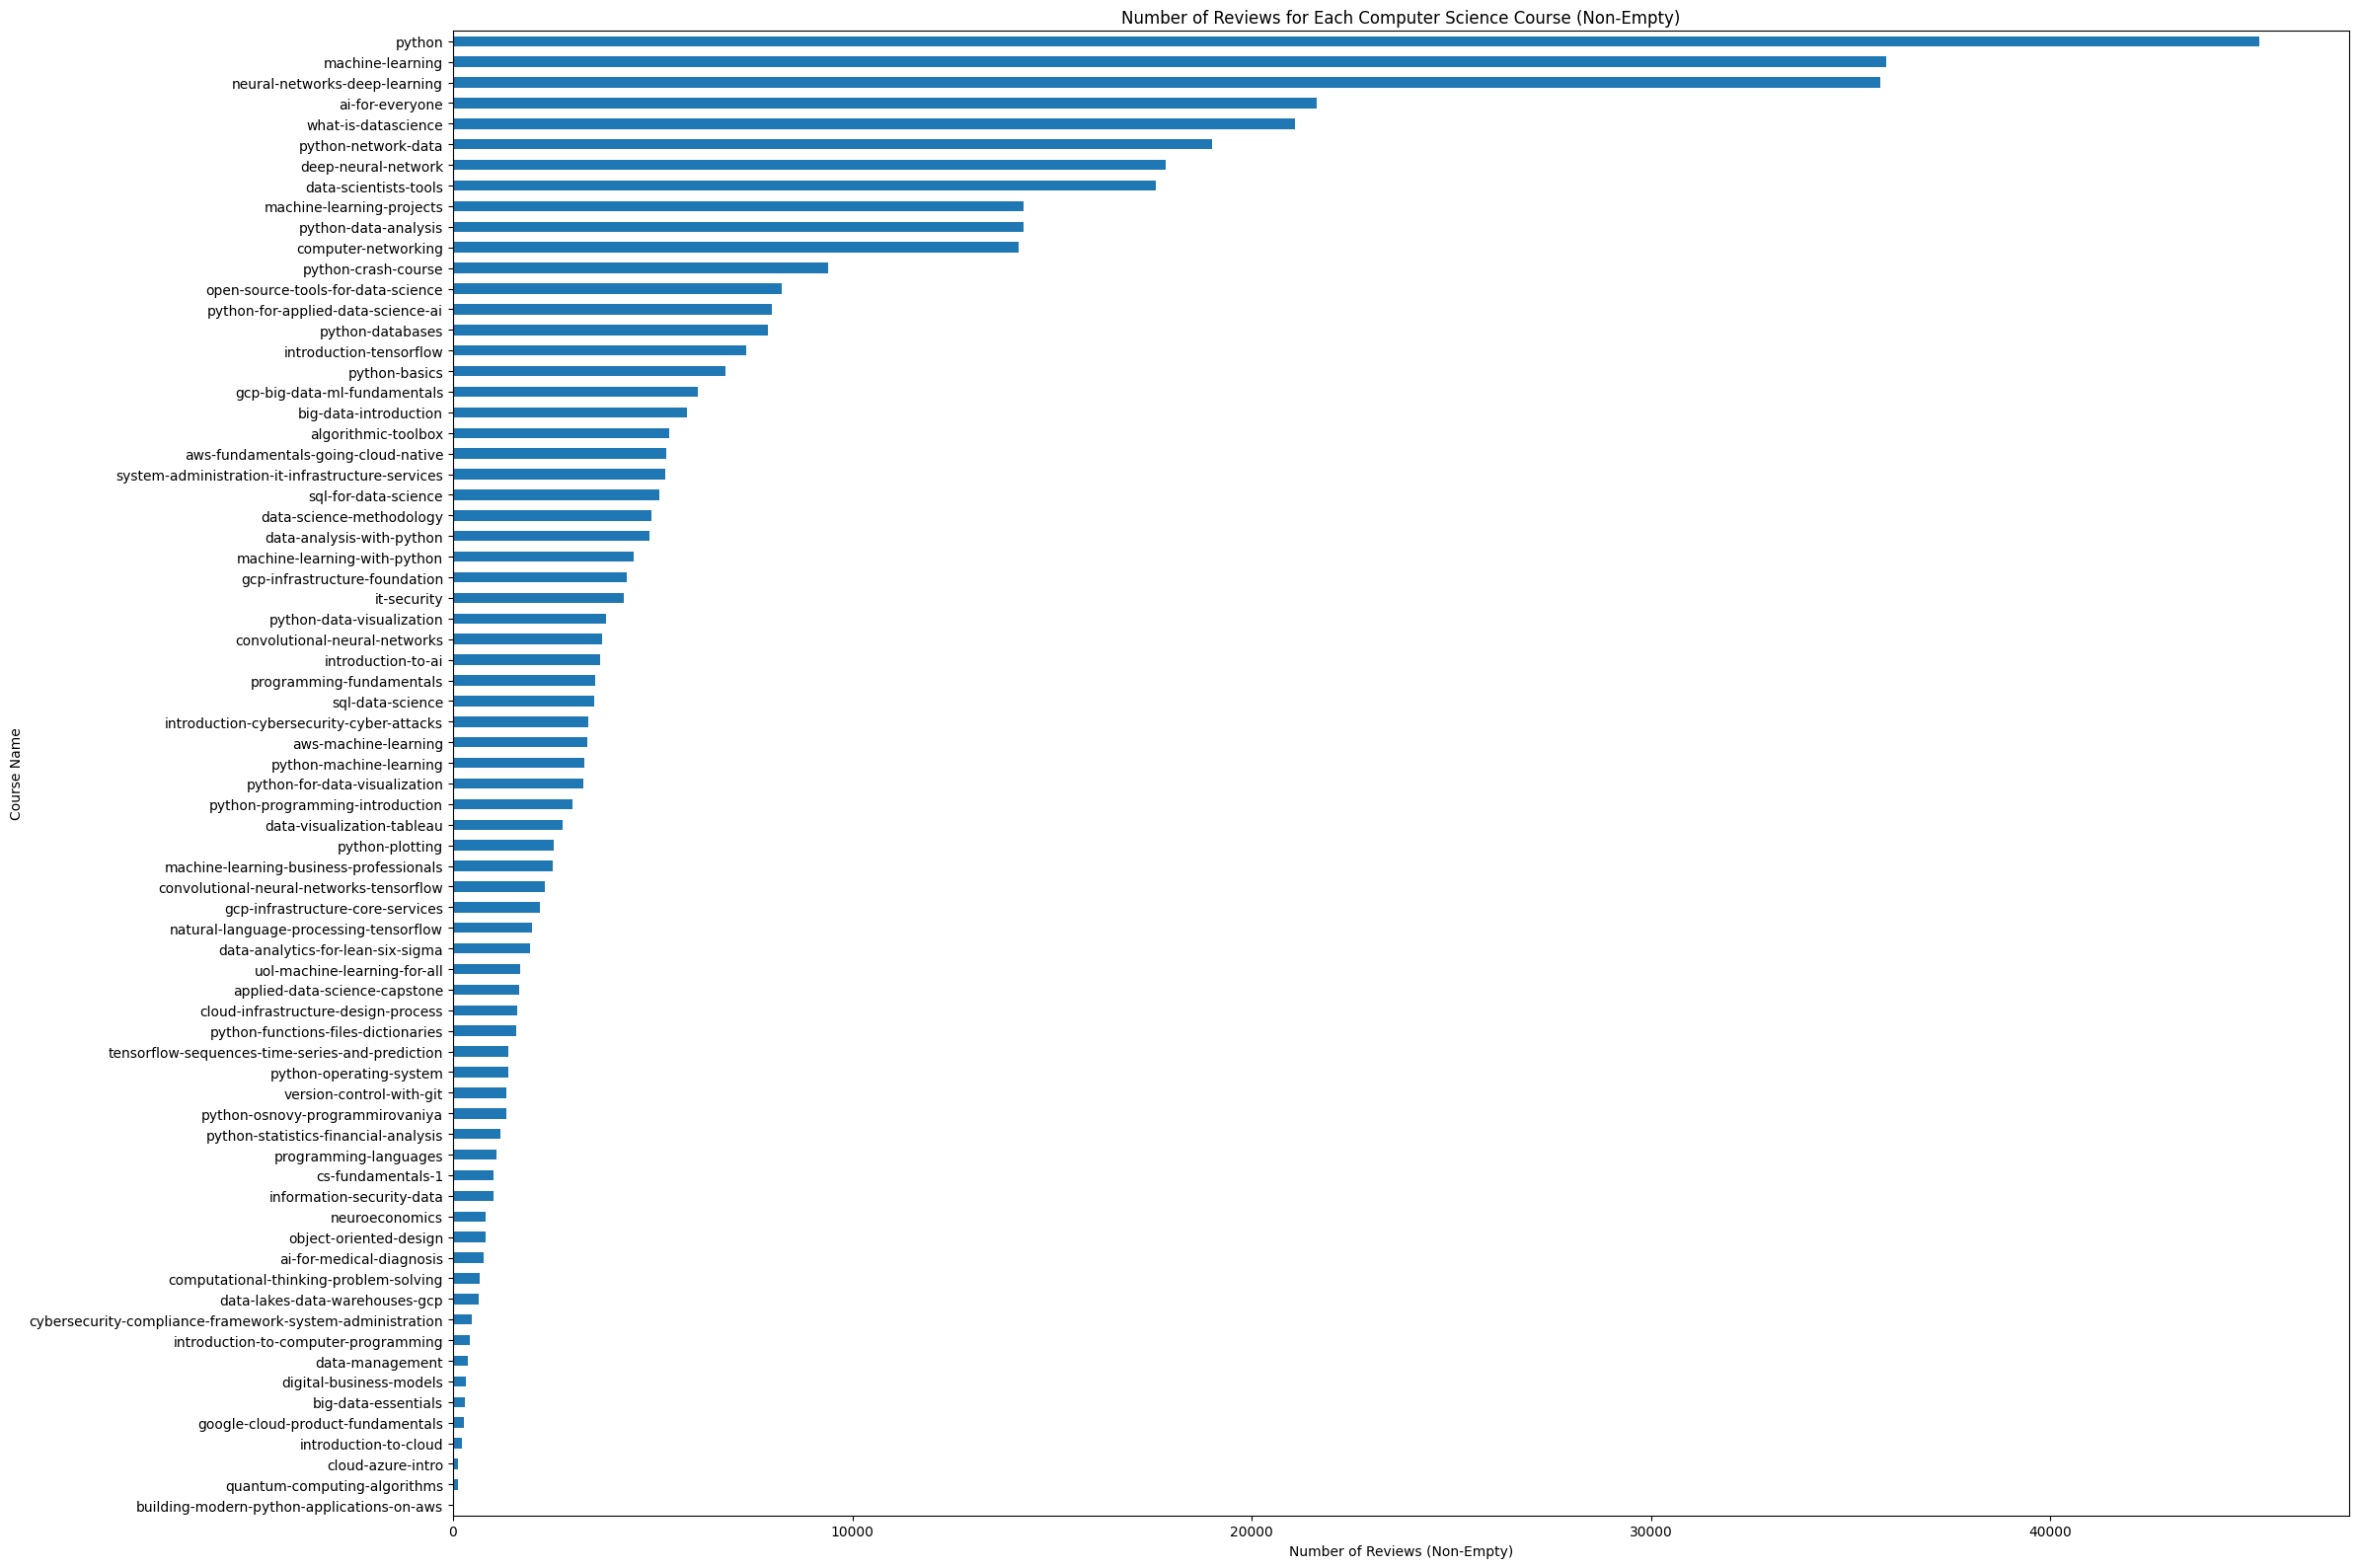

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# List of computer science courses to filter
cs_courses = [
    'python-data-analysis', 'python', 'computer-networking', 'python-crash-course',
    'neural-networks-deep-learning', 'what-is-datascience',
    'introduction-tensorflow', 'open-source-tools-for-data-science',
    'deep-neural-network', 'sql-for-data-science', 'system-administration-it-infrastructure-services',
    'introduction-cybersecurity-cyber-attacks', 'data-scientists-tools',
    'convolutional-neural-networks-tensorflow', 'python-network-data',
    'machine-learning-projects', 'convolutional-neural-networks',
    'python-basics', 'it-security', 'cs-fundamentals-1',
    'gcp-big-data-ml-fundamentals', 'sql-data-science', 
    'natural-language-processing-tensorflow', 'python-operating-system',
    'programming-fundamentals', 'python-statistics-financial-analysis',
    'machine-learning', 'python-databases', 'ai-for-everyone',
    'data-analysis-with-python', 'machine-learning-with-python',
    'python-programming-introduction', 'uol-machine-learning-for-all',
    'python-data-visualization', 'introduction-to-cloud',
    'cloud-infrastructure-design-process', 'aws-fundamentals-going-cloud-native',
    'tensorflow-sequences-time-series-and-prediction',
    'computational-thinking-problem-solving', 'introduction-to-computer-programming',
    'python-functions-files-dictionaries', 'programming-languages',
    'data-analytics-for-lean-six-sigma', 'big-data-introduction',
    'python-for-applied-data-science-ai', 'big-data-essentials',
    'python-plotting', 'version-control-with-git',
    'data-visualization-tableau', 'ai-for-medical-diagnosis',
    'python-for-data-visualization', 'python-machine-learning',
    'google-cloud-product-fundamentals', 'building-modern-python-applications-on-aws',
    'data-lakes-data-warehouses-gcp', 'introduction-to-ai',
    'algorithmic-toolbox', 'gcp-infrastructure-foundation', 
    'aws-machine-learning', 'machine-learning-business-professionals',
    'object-oriented-design', 'neuroeconomics', 'cloud-azure-intro',
    'data-science-methodology', 'gcp-infrastructure-core-services', 
    'data-management', 'quantum-computing-algorithms',
    'digital-business-models', 'cybersecurity-compliance-framework-system-administration',
    'python-osnovy-programmirovaniya', 'applied-data-science-capstone',
    'computer-science', 'information-security-data'
]

# Filter the DataFrame for these courses
filtered_df = df_cs_reviews_only[df_cs_reviews_only['course_id'].isin(cs_courses)]

# Count the number of occurrences of reviews for each course
review_counts = filtered_df['course_id'].value_counts()

# Plot the results
plt.figure(figsize=(24, 16))
review_counts.plot(kind='barh')
plt.xlabel('Number of Reviews (Non-Empty)')
plt.ylabel('Course Name')
plt.title('Number of Reviews for Each Computer Science Course (Non-Empty)')
plt.gca().invert_yaxis()  # To have the highest count at the top
plt.tight_layout()
plt.show()

In [43]:
# Count the number of entries for the specific course
course_name = 'building-modern-python-applications-on-aws'
entry_count = df_cs_reviews_only[df_cs_reviews_only['course_id'] == course_name].shape[0]

# Display the result
print(f'Number of entries for "{course_name}": {entry_count}')


Number of entries for "building-modern-python-applications-on-aws": 3


In [44]:
# remove all course entries where the number of reviews is < 25, can't gain useful insights for a module
# can use all of the data for emotion sentiment and normal sentiment training
# for the opinion mining and topic modelling

'''
For opinion mining, generally:

* Minimum: At least 20-30 reviews for meaningful insights.
* Optimal: Ideally 50-100+ reviews to gain a better understanding of sentiment and prevalent opinions.
'''

'\nFor opinion mining, generally:\n\n* Minimum: At least 20-30 reviews for meaningful insights.\n* Optimal: Ideally 50-100+ reviews to gain a better understanding of sentiment and prevalent opinions.\n'

In [45]:
# Count the number of reviews per course
course_review_counts = df_cs_reviews_only['course_id'].value_counts()
# Create a boolean mask for courses with at least 30 and 100 reviews
mask_at_least_30 = course_review_counts[course_review_counts >= 30].index
mask_at_least_100 = course_review_counts[course_review_counts >= 100].index

# Filter the original DataFrame based on these masks
df_cs_reviews_only_at_least_30 = df_cs_reviews_only[df_cs_reviews_only['course_id'].isin(mask_at_least_30)].reset_index(drop=True)
df_cs_reviews_only_at_least_100 = df_cs_reviews_only[df_cs_reviews_only['course_id'].isin(mask_at_least_100)].reset_index(drop=True)


In [46]:
# course entries with at least 30 entries
df_cs_reviews_only_at_least_30 

,reviews,reviewers,date_reviews,rating,course_id,month,departments
0,I did not find this course helpful. The assign...,By Eric V H,2017-10-05,1,python,2017-10,Computer Science
1,I got a 95% and maybe I learned something but ...,By Connor B,2017-08-06,1,python,2017-08,Computer Science
2,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,2019-03-28,1,python,2019-03,Computer Science
3,We tried to use this class to teach a brown ba...,By Steve M,2015-10-20,1,python,2015-10,Computer Science
4,"To be honest, I thought the course stumbled an...",By Terence P,2016-05-11,1,python,2016-05,Computer Science
...,...,...,...,...,...,...,...
434262,g,By Brijesh K,2020-08-25,5,computer-networking,2020-08,Computer Science
434263,.,By Vasavi V M,2020-07-02,5,computer-networking,2020-07,Computer Science
434264,.,By Drishti D,2020-06-20,5,computer-networking,2020-06,Computer Science
434265,.,By FAUSTINE F K,2020-06-07,5,computer-networking,2020-06,Computer Science


In [47]:
# course entries with at least 100 entries, if results are not good, then I'd do at least 500
df_cs_reviews_only_at_least_100 

,reviews,reviewers,date_reviews,rating,course_id,month,departments
0,I did not find this course helpful. The assign...,By Eric V H,2017-10-05,1,python,2017-10,Computer Science
1,I got a 95% and maybe I learned something but ...,By Connor B,2017-08-06,1,python,2017-08,Computer Science
2,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,2019-03-28,1,python,2019-03,Computer Science
3,We tried to use this class to teach a brown ba...,By Steve M,2015-10-20,1,python,2015-10,Computer Science
4,"To be honest, I thought the course stumbled an...",By Terence P,2016-05-11,1,python,2016-05,Computer Science
...,...,...,...,...,...,...,...
434262,g,By Brijesh K,2020-08-25,5,computer-networking,2020-08,Computer Science
434263,.,By Vasavi V M,2020-07-02,5,computer-networking,2020-07,Computer Science
434264,.,By Drishti D,2020-06-20,5,computer-networking,2020-06,Computer Science
434265,.,By FAUSTINE F K,2020-06-07,5,computer-networking,2020-06,Computer Science


In [48]:
# Count the number of reviews per course
course_review_counts = df_cs_reviews_only['course_id'].value_counts()
# Create a boolean mask for courses with at least 30 and 500 reviews
mask_at_least_500 = course_review_counts[course_review_counts >= 500].index # but 500 is not a realistic number of reviews for a single module at a univeristy where the module is taken in-person

# Filter the original DataFrame based on these masks
df_cs_reviews_only_at_least_500 = df_cs_reviews_only[df_cs_reviews_only['course_id'].isin(mask_at_least_500)].reset_index(drop=True)
df_cs_reviews_only_at_least_500

,reviews,reviewers,date_reviews,rating,course_id,month,departments
0,I did not find this course helpful. The assign...,By Eric V H,2017-10-05,1,python,2017-10,Computer Science
1,I got a 95% and maybe I learned something but ...,By Connor B,2017-08-06,1,python,2017-08,Computer Science
2,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,2019-03-28,1,python,2019-03,Computer Science
3,We tried to use this class to teach a brown ba...,By Steve M,2015-10-20,1,python,2015-10,Computer Science
4,"To be honest, I thought the course stumbled an...",By Terence P,2016-05-11,1,python,2016-05,Computer Science
...,...,...,...,...,...,...,...
431636,g,By Brijesh K,2020-08-25,5,computer-networking,2020-08,Computer Science
431637,.,By Vasavi V M,2020-07-02,5,computer-networking,2020-07,Computer Science
431638,.,By Drishti D,2020-06-20,5,computer-networking,2020-06,Computer Science
431639,.,By FAUSTINE F K,2020-06-07,5,computer-networking,2020-06,Computer Science


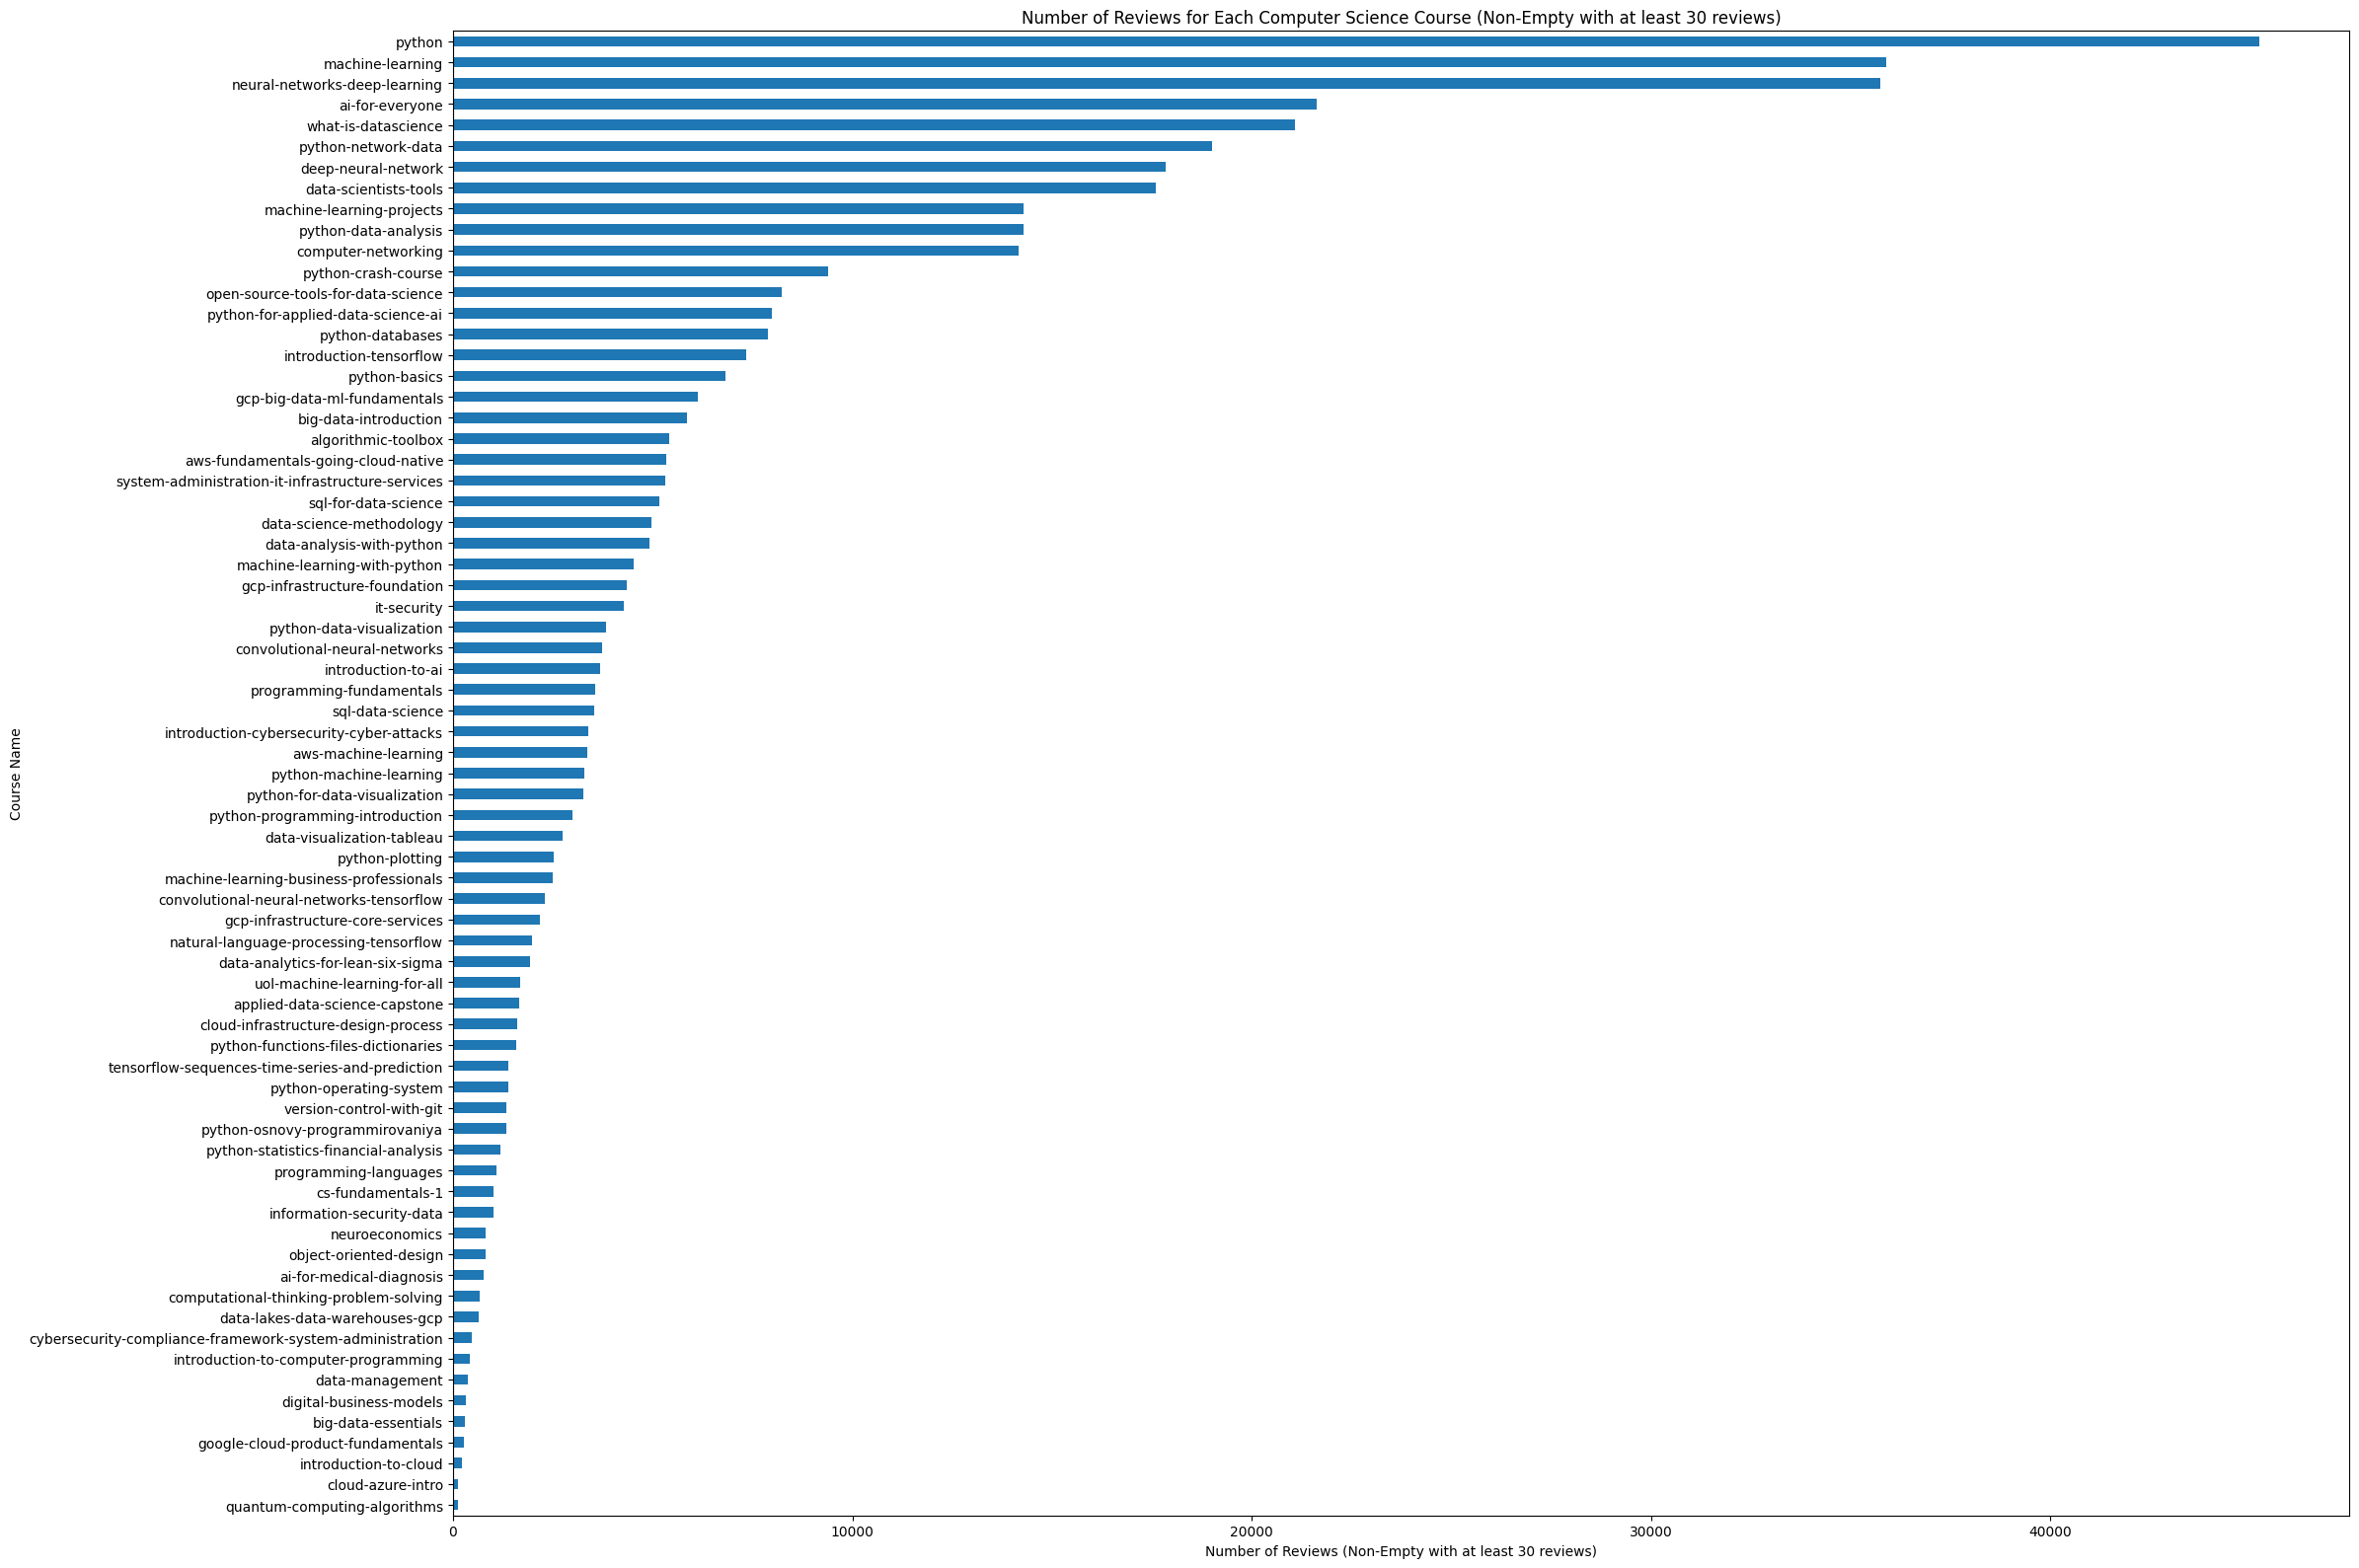

In [49]:
df_cs_reviews_only_at_least_30 
import pandas as pd
import matplotlib.pyplot as plt

# List of computer science courses to filter
cs_courses = [
    'python-data-analysis', 'python', 'computer-networking', 'python-crash-course',
    'neural-networks-deep-learning', 'what-is-datascience',
    'introduction-tensorflow', 'open-source-tools-for-data-science',
    'deep-neural-network', 'sql-for-data-science', 'system-administration-it-infrastructure-services',
    'introduction-cybersecurity-cyber-attacks', 'data-scientists-tools',
    'convolutional-neural-networks-tensorflow', 'python-network-data',
    'machine-learning-projects', 'convolutional-neural-networks',
    'python-basics', 'it-security', 'cs-fundamentals-1',
    'gcp-big-data-ml-fundamentals', 'sql-data-science', 
    'natural-language-processing-tensorflow', 'python-operating-system',
    'programming-fundamentals', 'python-statistics-financial-analysis',
    'machine-learning', 'python-databases', 'ai-for-everyone',
    'data-analysis-with-python', 'machine-learning-with-python',
    'python-programming-introduction', 'uol-machine-learning-for-all',
    'python-data-visualization', 'introduction-to-cloud',
    'cloud-infrastructure-design-process', 'aws-fundamentals-going-cloud-native',
    'tensorflow-sequences-time-series-and-prediction',
    'computational-thinking-problem-solving', 'introduction-to-computer-programming',
    'python-functions-files-dictionaries', 'programming-languages',
    'data-analytics-for-lean-six-sigma', 'big-data-introduction',
    'python-for-applied-data-science-ai', 'big-data-essentials',
    'python-plotting', 'version-control-with-git',
    'data-visualization-tableau', 'ai-for-medical-diagnosis',
    'python-for-data-visualization', 'python-machine-learning',
    'google-cloud-product-fundamentals', 'building-modern-python-applications-on-aws',
    'data-lakes-data-warehouses-gcp', 'introduction-to-ai',
    'algorithmic-toolbox', 'gcp-infrastructure-foundation', 
    'aws-machine-learning', 'machine-learning-business-professionals',
    'object-oriented-design', 'neuroeconomics', 'cloud-azure-intro',
    'data-science-methodology', 'gcp-infrastructure-core-services', 
    'data-management', 'quantum-computing-algorithms',
    'digital-business-models', 'cybersecurity-compliance-framework-system-administration',
    'python-osnovy-programmirovaniya', 'applied-data-science-capstone',
    'computer-science', 'information-security-data'
]

# Filter the DataFrame for these courses
filtered_df = df_cs_reviews_only_at_least_30[df_cs_reviews_only_at_least_30['course_id'].isin(cs_courses)]

# Count the number of occurrences of reviews for each course
review_counts = filtered_df['course_id'].value_counts()

# Plot the results
plt.figure(figsize=(24, 16))
review_counts.plot(kind='barh')
plt.xlabel('Number of Reviews (Non-Empty with at least 30 reviews)')
plt.ylabel('Course Name')
plt.title('Number of Reviews for Each Computer Science Course (Non-Empty with at least 30 reviews)')
plt.gca().invert_yaxis()  # To have the highest count at the top
plt.tight_layout()
plt.show()

In [50]:
# data points are sufficient for model training for sentiment analysis and opinion mining/topic modelling
len(cs_courses)

73

In [51]:
import pandas as pd

# Example DataFrames
# df_courses = pd.DataFrame({
#     'name': ['Course A', 'Course B', 'Course C'],
#     'course_id': [1, 2, 3],
#     'institution': ['Inst A', 'Inst B', 'Inst C']
# })

# df_cs_reviews_only_at_least_30 = pd.DataFrame({
#     'reviews': ['Review 1', 'Review 2'],
#     'course_id': [1, 2],
#     'departments': ['Computer Science', 'Computer Science']
# })

# Merge the two DataFrames based on course_id
df_combined = df_cs_reviews_only_at_least_30.merge(
    df_courses[['name', 'course_id', 'institution']],  # Selecting relevant columns from df_courses
    on='course_id',  # Merging on the course_id column
    how='left'  # Left join to keep all entries from df_cs_reviews_only_at_least_30
)

# Display the resulting DataFrame
print(df_combined)


                                                  reviews        reviewers  \
0       I did not find this course helpful. The assign...      By Eric V H   
1       I got a 95% and maybe I learned something but ...      By Connor B   
2       Two weeks of all sort of nonsense, including m...  By Cyntia R T G   
3       We tried to use this class to teach a brown ba...       By Steve M   
4       To be honest, I thought the course stumbled an...     By Terence P   
...                                                   ...              ...   
434262                                                  g     By Brijesh K   
434263                                                  .    By Vasavi V M   
434264                                                  .     By Drishti D   
434265                                                  .  By FAUSTINE F K   
434266                                                  G        By Reza S   

       date_reviews  rating            course_id    month      

In [52]:
df_combined

,reviews,reviewers,date_reviews,rating,course_id,month,departments,name,institution
0,I did not find this course helpful. The assign...,By Eric V H,2017-10-05,1,python,2017-10,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
1,I got a 95% and maybe I learned something but ...,By Connor B,2017-08-06,1,python,2017-08,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
2,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,2019-03-28,1,python,2019-03,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
3,We tried to use this class to teach a brown ba...,By Steve M,2015-10-20,1,python,2015-10,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
4,"To be honest, I thought the course stumbled an...",By Terence P,2016-05-11,1,python,2016-05,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
...,...,...,...,...,...,...,...,...,...
434262,g,By Brijesh K,2020-08-25,5,computer-networking,2020-08,Computer Science,The Bits and Bytes of Computer Networking,Google
434263,.,By Vasavi V M,2020-07-02,5,computer-networking,2020-07,Computer Science,The Bits and Bytes of Computer Networking,Google
434264,.,By Drishti D,2020-06-20,5,computer-networking,2020-06,Computer Science,The Bits and Bytes of Computer Networking,Google
434265,.,By FAUSTINE F K,2020-06-07,5,computer-networking,2020-06,Computer Science,The Bits and Bytes of Computer Networking,Google


In [53]:
# Dropping the 'reviewers' column from df_combined
df_combined = df_combined.drop(columns=['reviewers'], errors='ignore')

# Display the updated DataFrame
df_combined

,reviews,date_reviews,rating,course_id,month,departments,name,institution
0,I did not find this course helpful. The assign...,2017-10-05,1,python,2017-10,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
1,I got a 95% and maybe I learned something but ...,2017-08-06,1,python,2017-08,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
2,"Two weeks of all sort of nonsense, including m...",2019-03-28,1,python,2019-03,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
3,We tried to use this class to teach a brown ba...,2015-10-20,1,python,2015-10,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
4,"To be honest, I thought the course stumbled an...",2016-05-11,1,python,2016-05,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
...,...,...,...,...,...,...,...,...
434262,g,2020-08-25,5,computer-networking,2020-08,Computer Science,The Bits and Bytes of Computer Networking,Google
434263,.,2020-07-02,5,computer-networking,2020-07,Computer Science,The Bits and Bytes of Computer Networking,Google
434264,.,2020-06-20,5,computer-networking,2020-06,Computer Science,The Bits and Bytes of Computer Networking,Google
434265,.,2020-06-07,5,computer-networking,2020-06,Computer Science,The Bits and Bytes of Computer Networking,Google


In [57]:
df_combined = df_combined.dropna(subset=['reviews'])
df_combined

,reviews,date_reviews,rating,course_id,month,departments,name,institution
0,I did not find this course helpful. The assign...,2017-10-05,1,python,2017-10,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
1,I got a 95% and maybe I learned something but ...,2017-08-06,1,python,2017-08,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
2,"Two weeks of all sort of nonsense, including m...",2019-03-28,1,python,2019-03,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
3,We tried to use this class to teach a brown ba...,2015-10-20,1,python,2015-10,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
4,"To be honest, I thought the course stumbled an...",2016-05-11,1,python,2016-05,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan
...,...,...,...,...,...,...,...,...
434262,g,2020-08-25,5,computer-networking,2020-08,Computer Science,The Bits and Bytes of Computer Networking,Google
434263,.,2020-07-02,5,computer-networking,2020-07,Computer Science,The Bits and Bytes of Computer Networking,Google
434264,.,2020-06-20,5,computer-networking,2020-06,Computer Science,The Bits and Bytes of Computer Networking,Google
434265,.,2020-06-07,5,computer-networking,2020-06,Computer Science,The Bits and Bytes of Computer Networking,Google


In [55]:
df_combined['institution'].unique()
institutions = ['University of Michigan', 'Google', 'DeepLearning.AI', 'IBM',
       'University of Pennsylvania', 'University of California, Davis',
       'Johns Hopkins University',
       'University of Illinois at Urbana-Champaign', 'Google Cloud',
       'Amazon Web Services', 'University of London',
       'University of California San Diego',
       'The Hong Kong University of Science and Technology',
       'Duke University', 'University of Amsterdam', 'Atlassian',
       'National Research University Higher School of Economics',
       'Wesleyan University', 'LearnQuest', 'University of Alberta',
       'Royal Holloway, University of London', 'University of Washington',
       'Saint Petersburg State University', 'Lund University', 'Yandex',
       'The University of Edinburgh', 'Stanford University']

array(['University of Michigan', 'Google', 'DeepLearning.AI', 'IBM',
       'University of Pennsylvania', 'University of California, Davis',
       'Johns Hopkins University',
       'University of Illinois at Urbana-Champaign', 'Google Cloud',
       'Amazon Web Services', 'University of London',
       'University of California San Diego',
       'The Hong Kong University of Science and Technology',
       'Duke University', 'University of Amsterdam', 'Atlassian',
       'National Research University Higher School of Economics',
       'Wesleyan University', 'LearnQuest', 'University of Alberta',
       'Royal Holloway, University of London', 'University of Washington',
       'Saint Petersburg State University', 'Lund University', 'Yandex',
       'The University of Edinburgh', 'Stanford University'], dtype=object)

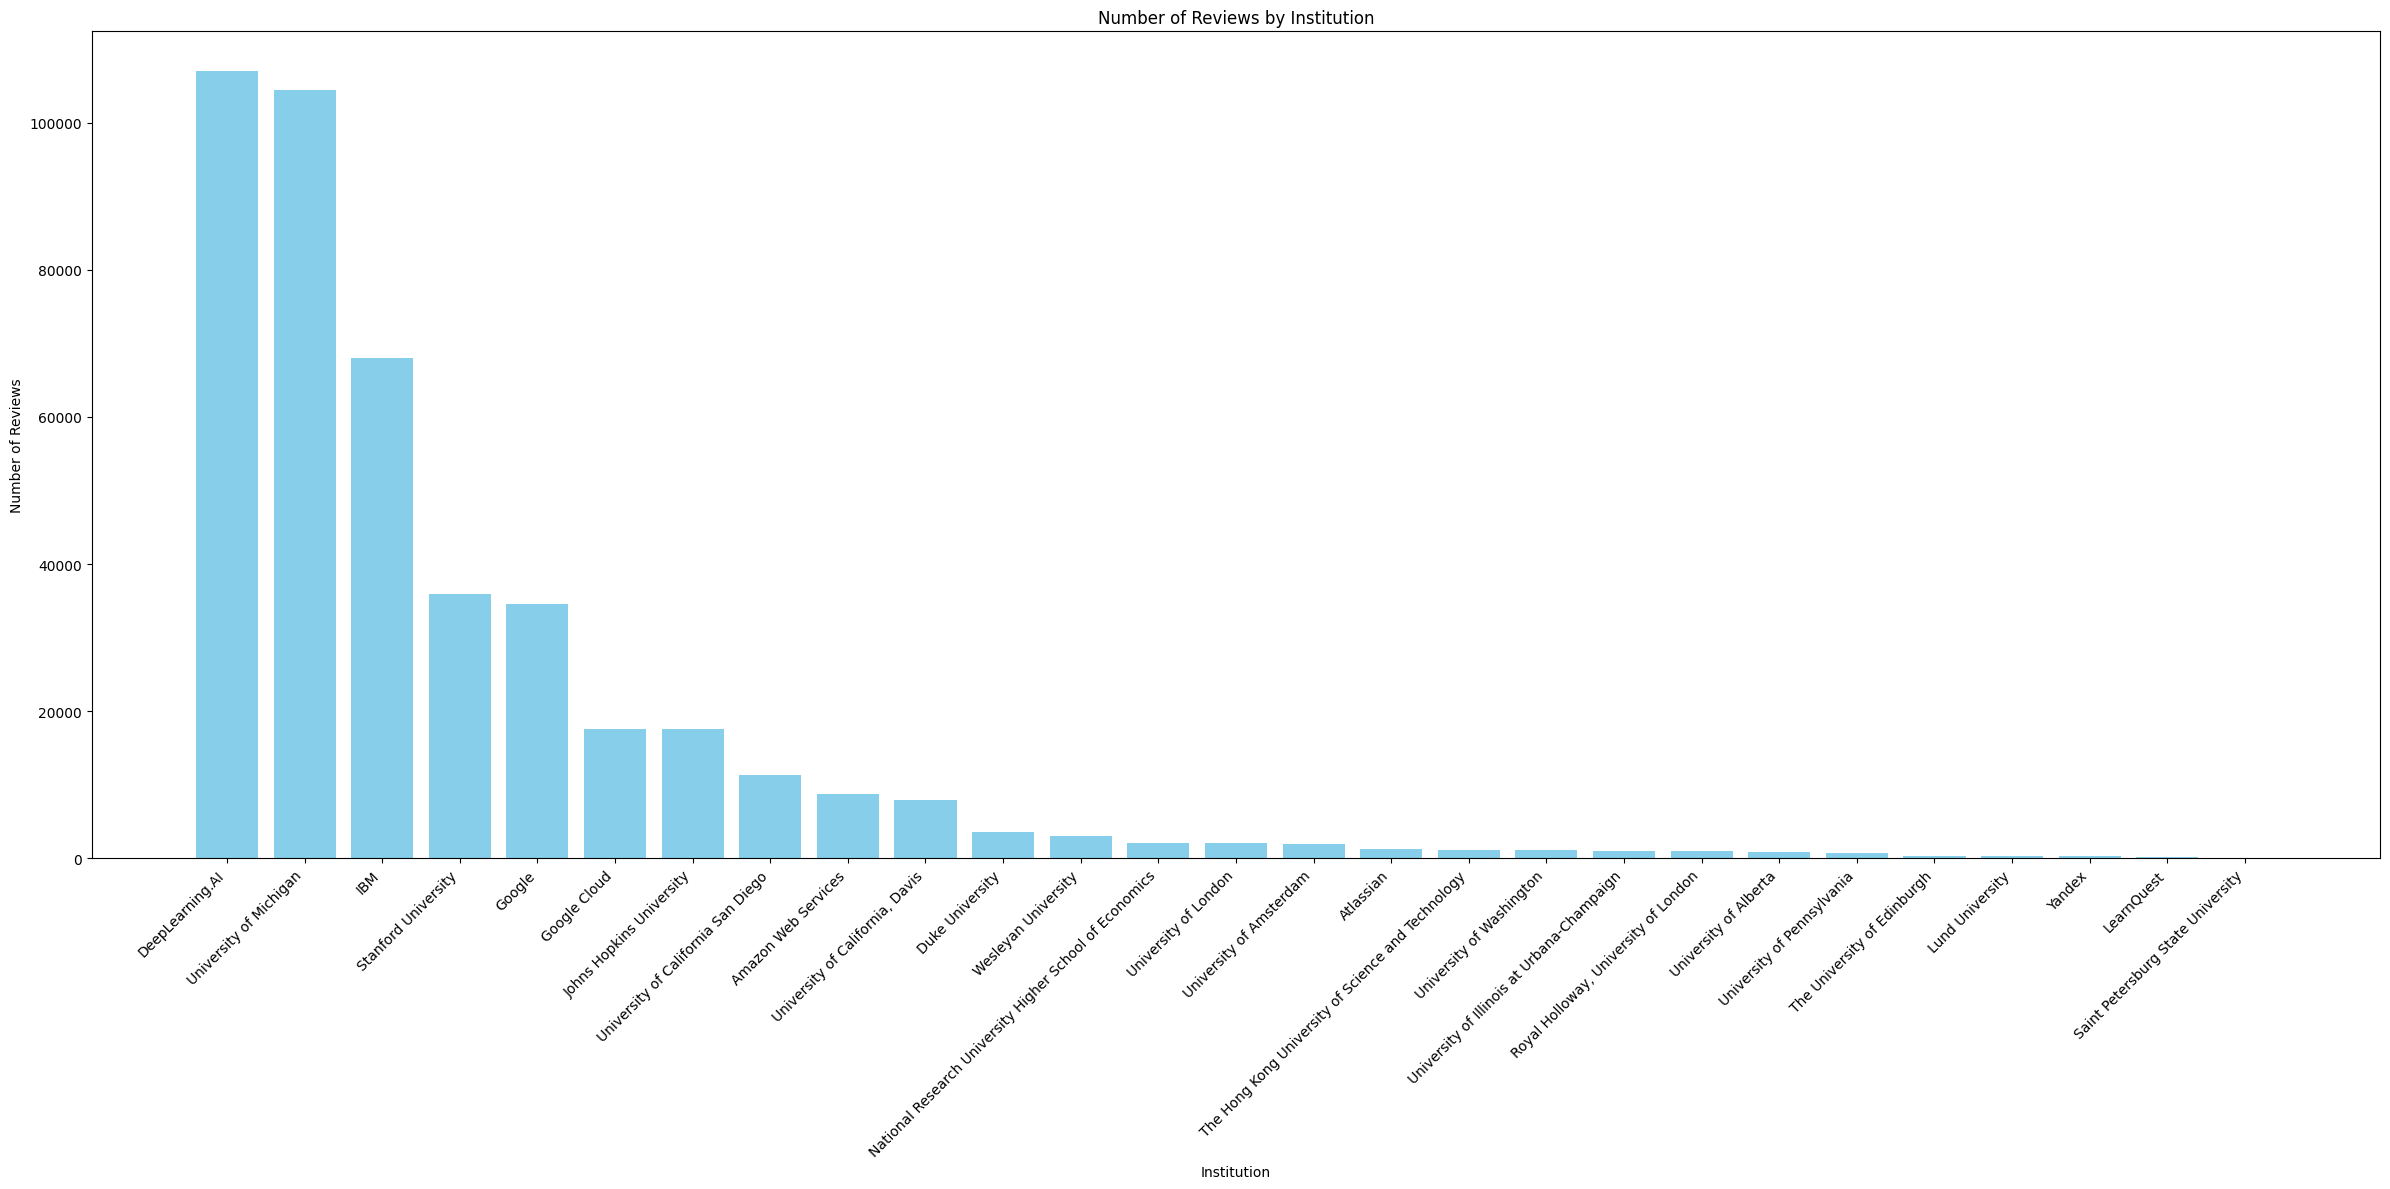

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# df_combined = pd.DataFrame({
#     'reviews': [...],
#     'course_id': [...],
#     'departments': [...],
#     'name': [...],
#     'institution': [...],  # Include this column
# })

# List of institutions to filter
institutions = [
    'University of Michigan', 'Google', 'DeepLearning.AI', 'IBM',
    'University of Pennsylvania', 'University of California, Davis',
    'Johns Hopkins University', 'University of Illinois at Urbana-Champaign',
    'Google Cloud', 'Amazon Web Services', 'University of London',
    'University of California San Diego',
    'The Hong Kong University of Science and Technology',
    'Duke University', 'University of Amsterdam', 'Atlassian',
    'National Research University Higher School of Economics',
    'Wesleyan University', 'LearnQuest', 'University of Alberta',
    'Royal Holloway, University of London', 'University of Washington',
    'Saint Petersburg State University', 'Lund University', 'Yandex',
    'The University of Edinburgh', 'Stanford University'
]

# Count occurrences of each institution
institution_counts = df_combined['institution'].value_counts()

# Filter counts for specified institutions
filtered_counts = institution_counts[institution_counts.index.isin(institutions)]

# Reset index to turn the Series into a DataFrame
filtered_counts = filtered_counts.reset_index()
filtered_counts.columns = ['institution', 'count']

# Plotting
plt.figure(figsize=(24, 12))
plt.bar(filtered_counts['institution'], filtered_counts['count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Reviews by Institution')
plt.xlabel('Institution')
plt.ylabel('Number of Reviews')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


can see that the data is mostly from universities, inclding one british one

for the recommendations to teachers based on analysis (sentiment and opinion) I can use either openAI or gemini API, free tier limits are sufficient.
Save results for future training / modelling

Need to save processed dataset to a csv (after change all to lowercase, stopwords removed etc.)